# Notebook for initial analysis of extreme event evolution

**Exploring Henri's [Baltic_MHW_clim](https://github.com/hdrake/MarineHeatwaveTransformations/blob/main/Baltic_MHW_clim.ipynb) Notebook with my data to find unique extreme events**

### Libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dask.diagnostics import ProgressBar
from datetime import date
import matplotlib as mpl
from matplotlib import colors
import dask

In [2]:
from xgcm import Grid
from matplotlib.colors import NoNorm
import regionate as reg
from tqdm import tqdm

In [3]:
import json

In [4]:
import ast

In [5]:
import pickle

### Load tos, pH, and metadata (static)

In [ ]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds_temp = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc", chunks={'time':100})

In [ ]:
static = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")

In [ ]:
#with open('coherent_regions_output.txt') as f: 
    #data = f.read()

In [ ]:
#ds = data.replace("\'", "\"")

In [ ]:
#ds

In [23]:
#dict_events = eval(open('coherent_regions_output.txt', 'r').read())

SyntaxError: invalid syntax (<string>, line 465)

In [25]:
#with open('coherent_regions_output.txt', 'rb') as handle:
  #b = pickle.loads(handle.read())

UnpicklingError: invalid load key, '{'.

In [8]:
static

<xarray.Dataset>
Dimensions:       (yh: 1080, xh: 1440, yq: 1080, xq: 1440)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables: (12/27)
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    ...            ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    external_variables:  areacello areacello

In [11]:
ds_ph = xr.open_dataset(f"{dir_path}/data/ocean_bling_daily.01860101-01901231.ph.nc", chunks={'time':100})

/data/homezvol3/mariant3/.conda/envs/mhw/lib/python3.11/site-packages/xarray/coding/times.py:831: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [9]:
ds_temp

<xarray.Dataset>
Dimensions:     (time: 1825, nv: 2, yh: 1080, xh: 1440)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0186-01-01 12:00:00 ... 0190-12-31 12:00:00
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    time_bnds   (time, nv) object dask.array<chunksize=(100, 2), meta=np.ndarray>
    tos         (time, yh, xh) float32 dask.array<chunksize=(100, 1080, 1440), meta=np.ndarray>
Attributes:
    filename:            ocean_daily_cmip.01860101-01901231.tos.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [13]:
ds_ph

<xarray.Dataset>
Dimensions:     (time: 1825, nv: 2, yh: 1080, xh: 1440)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0186-01-01 12:00:00 ... 0190-12-31 12:00:00
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    ph          (time, yh, xh) float32 dask.array<chunksize=(100, 1080, 1440), meta=np.ndarray>
    time_bnds   (time, nv) object dask.array<chunksize=(100, 2), meta=np.ndarray>
Attributes:
    filename:            ocean_bling_daily.01860101-01901231.ph.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

## merging static file with ds_temp/ds_ph

In [10]:
coords = {
    'X': {'center': 'xh', 'right': 'xq'},
    'Y': {'center': 'yh', 'right': 'yq'}
}

metrics = {
    ('X','Y'): "areacello",
}

boundary = {"X":"periodic", "Y":"periodic"}

In [11]:
coords

{'X': {'center': 'xh', 'right': 'xq'}, 'Y': {'center': 'yh', 'right': 'yq'}}

In [12]:
ds_tos_stat = xr.merge([static,ds_temp])

In [13]:
ds_ph_stat = xr.merge([static,ds_ph])

NameError: name 'ds_ph' is not defined

In [13]:
grid = Grid(ds_tos_stat,coords=coords, metrics=metrics, boundary=boundary, autoparse_metadata= False)

In [14]:
t = 205

In [15]:
thresh = 29

In [16]:
mask_tos = ds_tos_stat['tos'] > thresh

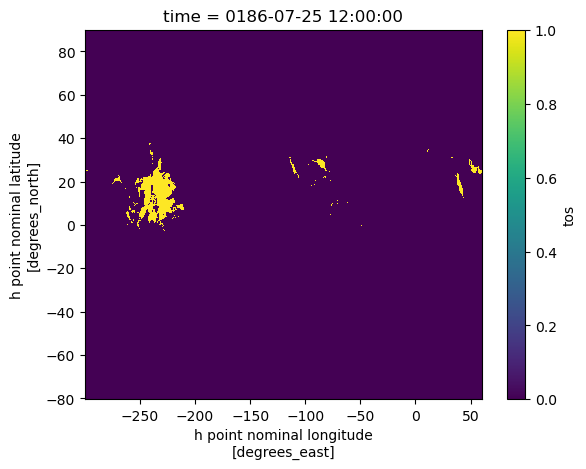

In [17]:
mask_tos.isel(time=t).plot()

In [19]:
A_regions = reg.MaskRegions(mask_tos.isel(time=0),grid,name= 'time = 0')
B_regions = reg.MaskRegions(mask_tos.isel(time=1),grid,name= 'time = 1')

n = 0
m = 0
A_region_n = A_regions.regions[n]
B_region_m = B_regions.regions[m]

In [20]:
A_regions.regions

{0: <regionate.region.GriddedRegion at 0x7f55d41f7710>,
 1: <regionate.region.GriddedRegion at 0x7f55d3bf4f10>,
 2: <regionate.region.GriddedRegion at 0x7f55d45326d0>,
 3: <regionate.region.GriddedRegion at 0x7f55d4274650>,
 4: <regionate.region.GriddedRegion at 0x7f55d43b6c50>,
 5: <regionate.region.GriddedRegion at 0x7f55d427ad10>,
 6: <regionate.region.GriddedRegion at 0x7f55d4265790>,
 7: <regionate.region.GriddedRegion at 0x7f55d4264750>,
 8: <regionate.region.GriddedRegion at 0x7f55d426a3d0>,
 9: <regionate.region.GriddedRegion at 0x7f55d4268750>,
 10: <regionate.region.GriddedRegion at 0x7f55d4363090>,
 11: <regionate.region.GriddedRegion at 0x7f55d43631d0>,
 12: <regionate.region.GriddedRegion at 0x7f55d4360ad0>,
 13: <regionate.region.GriddedRegion at 0x7f55d4361d50>,
 14: <regionate.region.GriddedRegion at 0x7f55d4361010>,
 15: <regionate.region.GriddedRegion at 0x7f55d4363690>,
 16: <regionate.region.GriddedRegion at 0x7f55d4363250>,
 17: <regionate.region.GriddedRegion at 0

In [18]:
def masked_area(grid, mask):
    return (mask * grid._ds.areacello).sum(['xh', 'yh'])

def large_contiguous_regions(grid, mask, cutoff=(370e3)**2):
    i, j, lon_c, lat_c = reg.grid_boundaries_from_mask(grid, mask)
    regions = {}
    for r in range(len(i)):
        #print(r)
        rmask = reg.mask_from_grid_boundaries(lon_c[r], lat_c[r], grid)
        #print 
        if masked_area(grid, rmask) >= cutoff:
            regions[r] = {
                'r': r,
                'i': i[r],
                'j': j[r],
                'lon_c': lon_c[r],
                'lat_c': lat_c[r],
                'mask': rmask
            }
    return regions

In [19]:
def coherent_regions(grid, regions1, regions2):
    pairs = []
    for region1 in regions1.values():
        for region2 in regions2.values():
            if coherent_masks(region1['mask'], region2['mask']):
                pairs.append((region1, region2))
    return pairs
            
def coherent_masks(mask1, mask2):
    overlap_area = masked_area(grid, mask1 & mask2)
    return (
        (overlap_area >= 0.5*masked_area(grid, mask1)) |
        (overlap_area >= 0.5*masked_area(grid, mask2))
    )

In [20]:
def consecutive_coherent_regions(grid, masks):
    consecutive_pairs = []
    for (t1, t2) in zip(masks['time'][:-1], masks['time'][1:]):
        print(t1.values, end=", ")
        region1 = large_contiguous_regions(grid, masks.sel(time=t1))
        region2 = large_contiguous_regions(grid, masks.sel(time=t2))
        consecutive_pairs.append(
            coherent_regions(grid, region1, region2)
        )
    
    return consecutive_pairs

In [29]:
i, j, lon_c, lat_c = reg.grid_boundaries_from_mask(grid, mask_tos.isel(time=t))

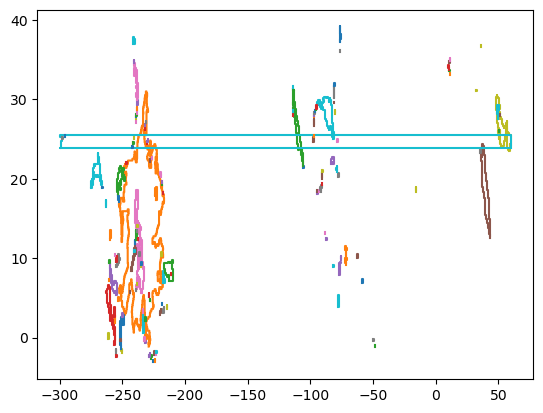

In [30]:
for (lon, lat) in zip(lon_c, lat_c):
    plt.plot(lon, lat)

In [26]:
reg.grid_boundaries_from_mask(grid, mask_tos.isel(time=t))

([array([298, 299, 299, 298, 298]),
  array([302, 303, 303, 303, 302, 302, 302]),
  array([289, 290, 291, 291, 292, 293, 293, 292, 291, 290, 290, 289, 289]),
  array([180, 181, 181, 180, 180]),
  array([285, 286, 287, 288, 288, 287, 287, 286, 286, 285, 285]),
  array([301, 302, 302, 302, 301, 301, 301]),
  array([306, 307, 307, 306, 306]),
  array([179, 180, 180, 180, 179, 179, 179]),
  array([197, 198, 199, 199, 199, 198, 197, 196, 196, 197, 197]),
  array([307, 308, 308, 307, 307]),
  array([195, 196, 196, 196, 196, 196, 196, 196, 195, 195, 195, 194, 194,
         195, 195, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 200,
         199, 199, 198, 197, 197, 196, 195, 195, 194, 194, 193, 193, 193,
         192, 192, 191, 191, 191, 191, 191, 191, 191, 191, 192, 192, 193,
         193, 194, 194, 195, 195]),
  array([283, 284, 284, ..., 282, 283, 283]),
  array([1005, 1006, 1006, 1005, 1005]),
  array([173, 174, 175, 176, 176, 176, 176, 176, 176, 176, 175, 175, 174,
         174, 175

Cell below takes a while

In [22]:
test_regions = large_contiguous_regions(grid, mask_tos.isel(time=t))

In [42]:
len(test_regions)

8

### Plot large regions

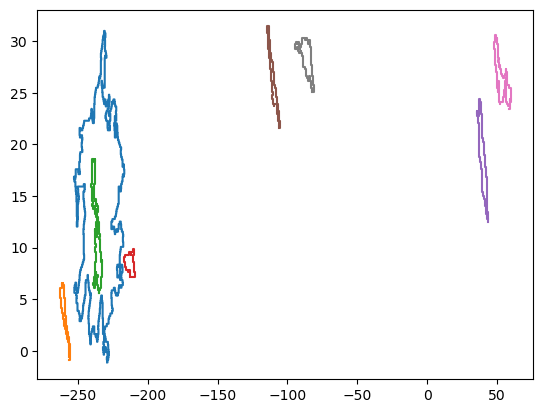

In [28]:
for r, r_region in test_regions.items():
    plt.plot(r_region['lon_c'], r_region['lat_c'])

In [29]:
test_regions1 = large_contiguous_regions(grid, mask_tos.isel(time=t+1))

In [30]:
test_regions1

{6: {'r': 6,
  'i': array([273, 274, 274, ..., 273, 273, 273]),
  'j': array([494, 494, 495, ..., 496, 495, 494]),
  'lon_c': array([-231.5 , -231.25, -231.25, ..., -231.5 , -231.5 , -231.5 ],
        dtype=float32),
  'lat_c': array([-2.124513 , -2.124513 , -1.8746654, ..., -1.374868 , -1.6247822,
         -1.8746654], dtype=float32),
  'mask': <xarray.DataArray 'mask' (yh: 1080, xh: 1440)>
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])
  Coordinates:
    * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
    * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  Attributes:
      standard_name:  region},
 12: {'r': 12,
  'i': arra

In [31]:
coherent_regions_output = coherent_regions(grid, test_regions, test_regions1)

In [32]:
coherent_regions_output

[({'r': 11,
   'i': array([283, 284, 284, ..., 282, 283, 283]),
   'j': array([498, 498, 499, ..., 499, 499, 498]),
   'lon_c': array([-229.  , -228.75, -228.75, ..., -229.25, -229.25, -229.  ],
         dtype=float32),
   'lat_c': array([-1.1249278 , -1.1249278 , -0.87496597, ..., -0.6249876 ,
          -0.87496597, -0.87496597], dtype=float32),
   'mask': <xarray.DataArray 'mask' (yh: 1080, xh: 1440)>
   array([[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]])
   Coordinates:
     * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
     * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
   Attributes:
       standard_name:  region},
  

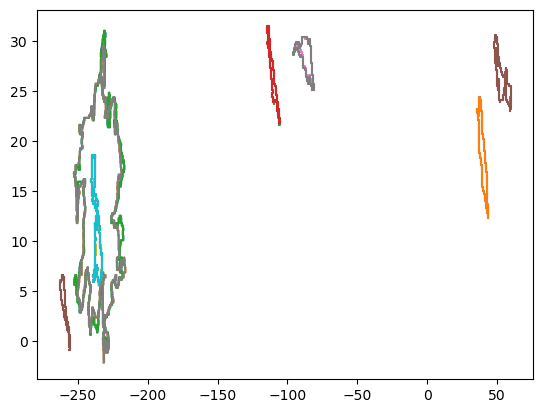

In [33]:
for i in coherent_regions_output:
    plt.plot(i[0]['lon_c'], i[0]['lat_c'])
    plt.plot(i[1]['lon_c'], i[1]['lat_c'])

In [ ]:
A_region_n.mask.plot()

In [ ]:
A_regions.mask.plot(label=A_regions.regions)
plt.show()

In [ ]:
A_regions.mask.plot(label=A_regions.regions)
plt.ylim(-30, 0)
plt.xlim(-260, -200)
plt.show()

In [47]:
A_masks = reg.GriddedRegion(str(n), A_regions.lons, A_regions.lats, grid, ij=(A_regions.i, A_regions.j))

AttributeError: 'MaskRegions' object has no attribute 'lons'

AttributeError: 'MaskRegions' object has no attribute 'lons'

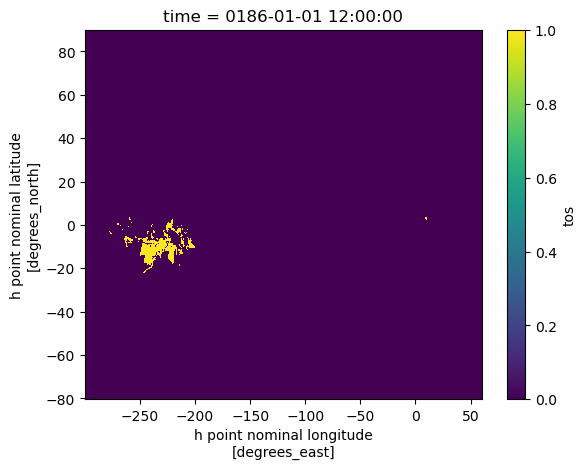

In [43]:
A_regions.mask.plot()
plt.plot(A_regions.lons, A_regions.lats)

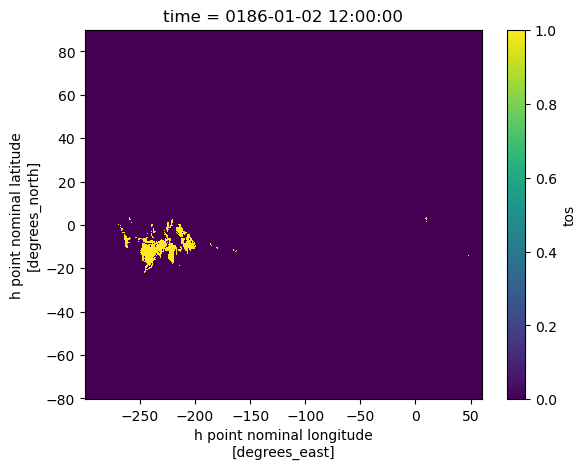

In [44]:
B_regions.mask.plot()

In [45]:
A_region_n.mask

<xarray.DataArray 'tos' (yh: 1080, xh: 1440)>
dask.array<getitem, shape=(1080, 1440), dtype=bool, chunksize=(1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    time     object 0186-01-01 12:00:00

In [21]:
A_mask_n = reg.GriddedRegion(str(n), A_region_n.lons, A_region_n.lats, grid, ij=(A_region_n.i, A_region_n.j))
B_mask_m = reg.GriddedRegion(str(m), B_region_m.lons, B_region_m.lats, grid, ij=(B_region_m.i, B_region_m.j))

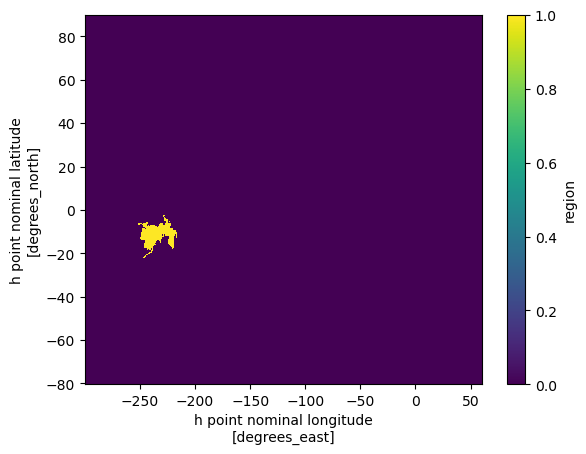

In [22]:
A_mask_n.mask.plot()

(-260.0, -200.0)

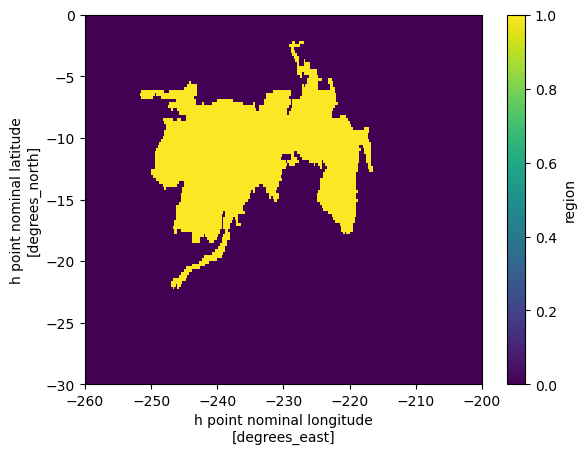

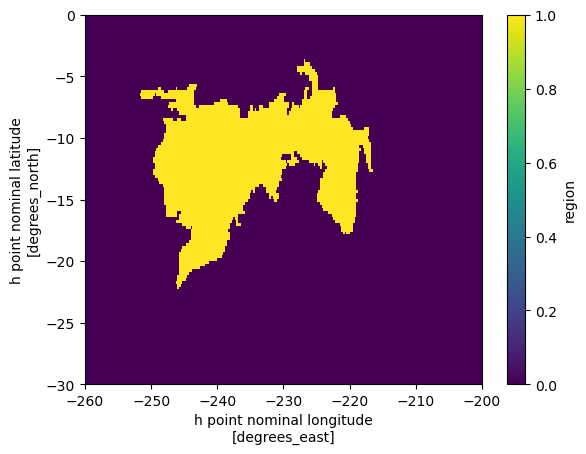

In [49]:
plt.figure()
A_mask_n.mask.plot()
plt.ylim(-30, 0)
plt.xlim(-260, -200)

plt.figure()
B_mask_m.mask.plot()
plt.ylim(-30, 0)
plt.xlim(-260, -200)

(-260.0, -200.0)

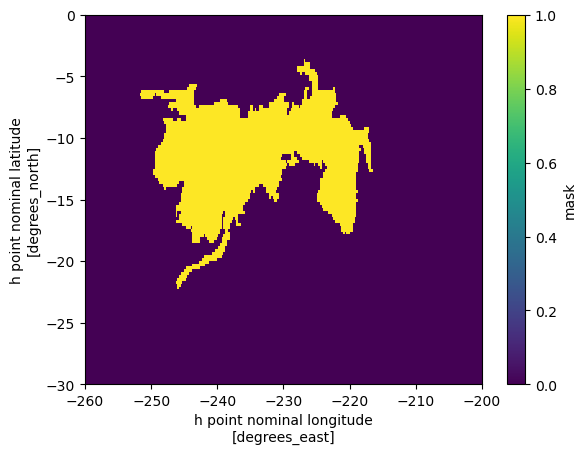

In [50]:
(A_mask_n.mask & B_mask_m.mask).plot()
plt.ylim(-30, 0)
plt.xlim(-260, -200)

(-260.0, -200.0)

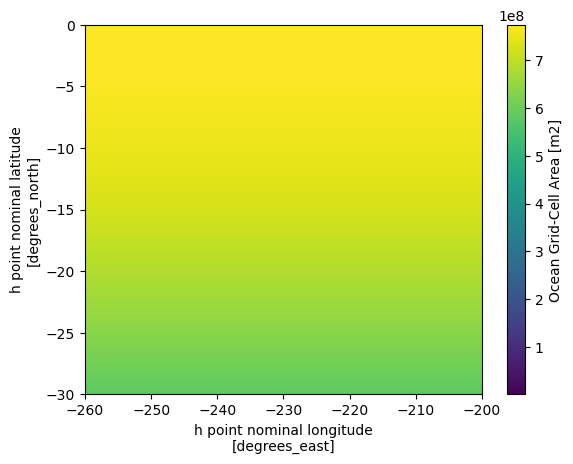

In [51]:
(ds_tos_stat.areacello).plot()
plt.ylim(-30, 0)
plt.xlim(-260, -200)

In [24]:
AB_mask = (A_mask_n.mask & B_mask_m.mask)

(-260.0, -200.0)

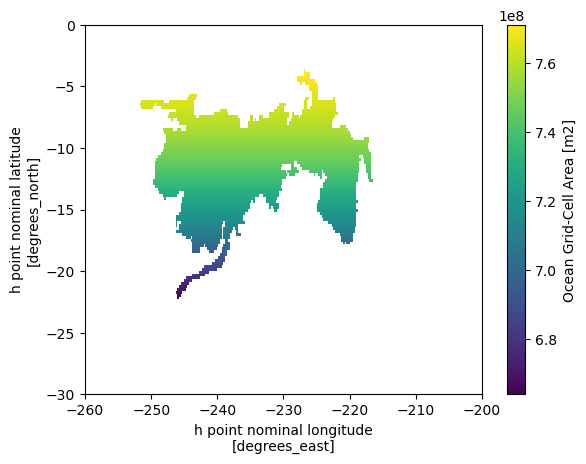

In [53]:
(ds_tos_stat.areacello).where(AB_mask).plot()
plt.ylim(-30, 0)
plt.xlim(-260, -200)

In [25]:
AB_area = (ds_tos_stat.areacello).where(AB_mask).sum(['xh','yh'])

In [26]:
A_area = (ds_tos_stat.areacello).where(A_mask_n.mask).sum(['xh','yh'])
B_area = (ds_tos_stat.areacello).where(B_mask_m.mask).sum(['xh','yh'])

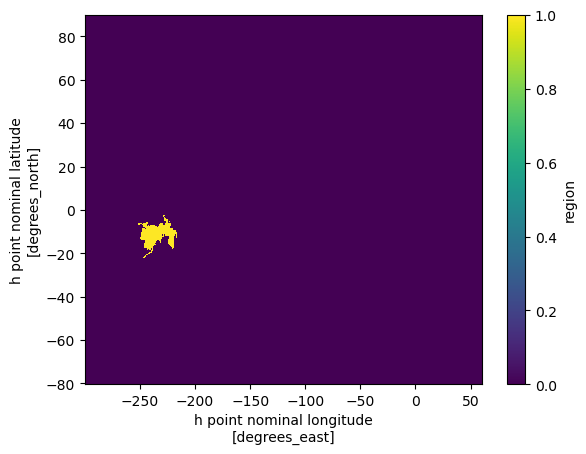

In [27]:
A_mask_n.mask.plot()

In [57]:
AB_area/A_area, AB_area/B_area

(<xarray.DataArray 'areacello' ()>
 array(0.9471715, dtype=float32),
 <xarray.DataArray 'areacello' ()>
 array(0.94127804, dtype=float32))

/tmp/mariant3/24938981/ipykernel_3008154/213778255.py:6: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(


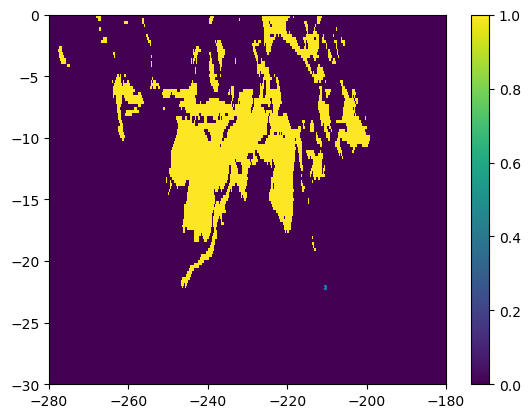

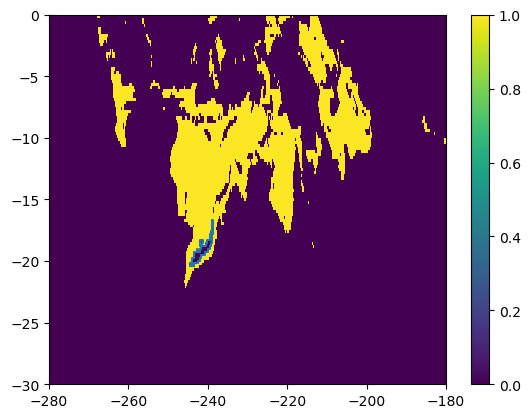

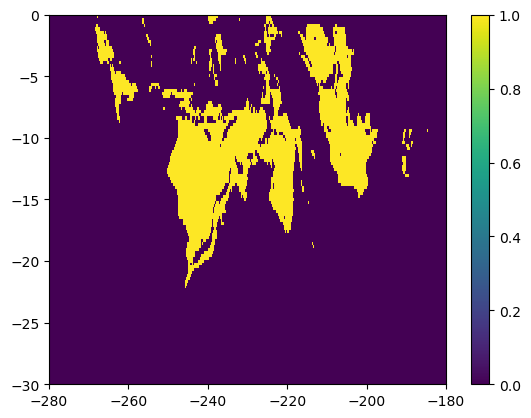

In [49]:
for i in range(3):
    n_regions = reg.MaskRegions(mask_tos.isel(time=i),grid,name= 'time = 0')
    mask_0 = n_regions.regions[1]

    plt.figure()
    plt.pcolor(
        ds_tos_stat.geolon_c,
        ds_tos_stat.geolat_c,
        mask_tos.isel(time=i)
    )
    plt.colorbar()
    plt.ylim(-30, 0)
    plt.xlim(-280, -180)
    
    plt.plot(mask_0.lons, mask_0.lats)

In [50]:
events

NameError: name 'events' is not defined

In [32]:
test_regions.keys()

dict_keys([11, 13, 36, 42, 65, 92, 98, 109])

In [ ]:
test_regions = large_contiguous_regions(grid, mask_tos.isel(time=t))

In [ ]:
for i in tqdm():
    pass

In [28]:
A_regions = test_regions

events = {}
current_event = 0
time = 0
end = 2
consecutive_pairs = []
for i in range(0,end):
    A_regions = large_contiguous_regions(grid, mask_tos.isel(time=i))
    B_regions = large_contiguous_regions(grid, mask_tos.isel(time=i+1))
    output = coherent_regions(grid, A_regions, B_regions)
    consecutive_pairs.append(output)
    events[i] = output

In [58]:
consecutive_pairs

2

0 0
26 16
30 27
0 0
16 14
27 44


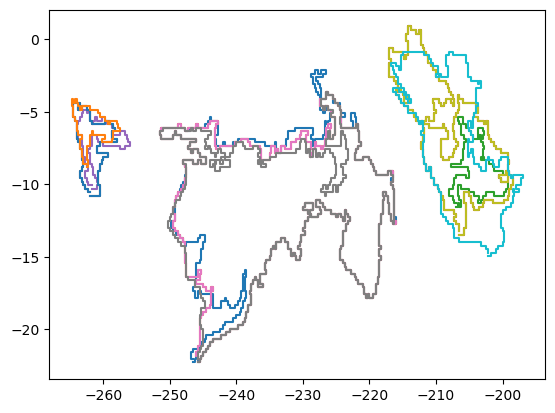

In [59]:
for value in events.values():
    for i in value:
        print(i[0]['r'],i[1]['r'])
        plt.plot(i[0]['lon_c'], i[0]['lat_c'])
        plt.plot(i[1]['lon_c'], i[1]['lat_c'])

0 0
26 16
30 27
0 0
16 14
27 44


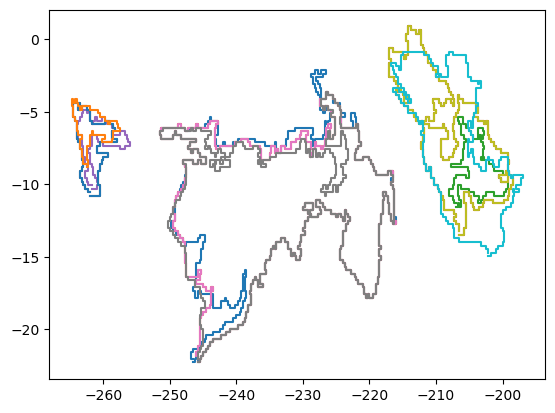

In [59]:
for value in events.values():
    for i in value:
        print(i[0]['r'],i[1]['r'])
        plt.plot(i[0]['lon_c'], i[0]['lat_c'])
        plt.plot(i[1]['lon_c'], i[1]['lat_c'])

In [61]:
for n, pairs in enumerate(consecutive_pairs):
    print(n)
    print(len(pairs))
    #print(pairs)

0
3
1
3


In [60]:
def event_label(events_dict):
    event_labels = []
    for value in events_dict.values():
        for i in value:

            new
            print(i[0]['r'],i[1]['r'])
            plt.plot(i[0]['lon_c'], i[0]['lat_c'])
            plt.plot(i[1]['lon_c'], i[1]['lat_c'])

IndentationError: expected an indented block after function definition on line 1 (3544828714.py, line 2)

In [48]:
def chains_of_events(consecutive_pairs):
    events = []
    for n, pairs in enumerate(consecutive_pairs):
        for p in pairs:

            new_event = True
            for event in events:
                 if (n == event[-1]["n"]+1) & (p[0]["r"] == event[-1]["r_next"]):
                    event.append({'n': n, 'r': p[0]['r'], 'r_next': p[1]['r']})
                    new_event = False
            if new_event:
                events.append([{'n': n, 'r': p[0]['r'], 'r_next': p[1]['r']}])
    for event in events:
        event.append({'n': event[-1]['n']+1, 'r': event[-1]['r_next'], 'r_next':None})
                
    return events

def prolonged_events(chains, cutoff=1):
    return [chain for chain in chains if len(chain)>=(cutoff-1)]

In [42]:
chains_of_events(consecutive_pairs)

[[{'n': 0, 'r': 0, 'r_next': 0},
  {'n': 1, 'r': 0, 'r_next': 0},
  {'n': 2, 'r': 0, 'r_next': None}],
 [{'n': 0, 'r': 26, 'r_next': 16},
  {'n': 1, 'r': 16, 'r_next': 14},
  {'n': 2, 'r': 14, 'r_next': None}],
 [{'n': 0, 'r': 30, 'r_next': 27},
  {'n': 1, 'r': 27, 'r_next': 44},
  {'n': 2, 'r': 44, 'r_next': None}]]

In [50]:
mhws = prolonged_events(chains_of_events(consecutive_pairs))

In [52]:
for event in mhws:
    print(event)

[{'n': 0, 'r': 0, 'r_next': 0}, {'n': 1, 'r': 0, 'r_next': 0}, {'n': 2, 'r': 0, 'r_next': None}]
[{'n': 0, 'r': 26, 'r_next': 16}, {'n': 1, 'r': 16, 'r_next': 14}, {'n': 2, 'r': 14, 'r_next': None}]
[{'n': 0, 'r': 30, 'r_next': 27}, {'n': 1, 'r': 27, 'r_next': 44}, {'n': 2, 'r': 44, 'r_next': None}]


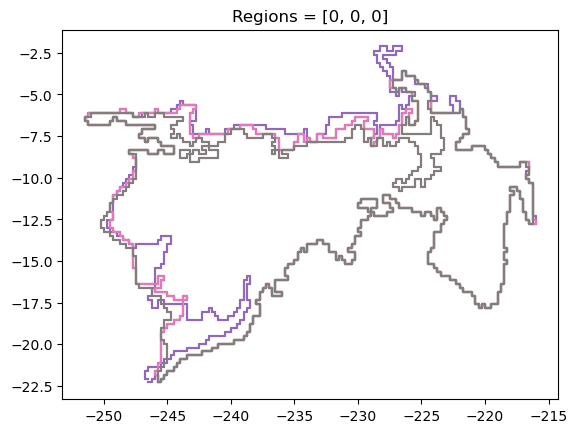

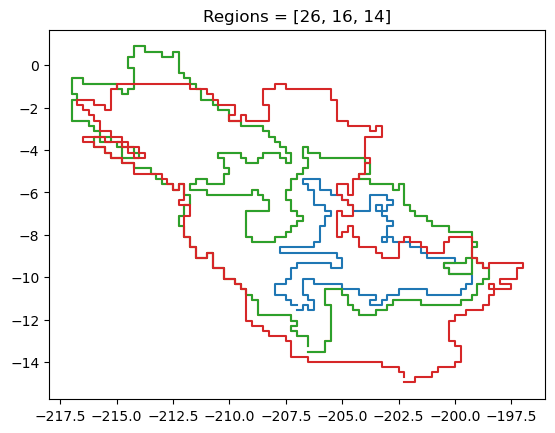

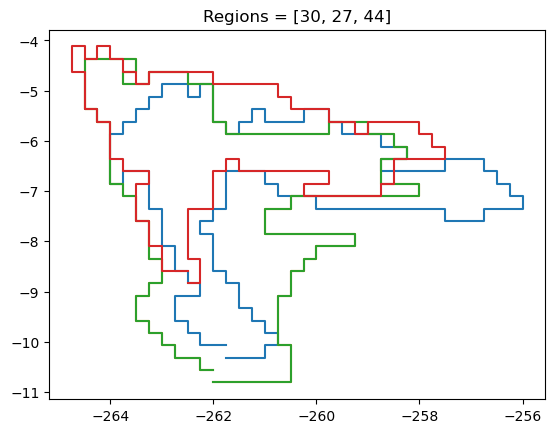

In [73]:
for event in mhws:
    plot_region_title = []
    for day in event:
        plot_regions = (day['r'],day['r_next'])
        plot_region_title += [day['r']]
        for value in events.values():
            for i in value:
                if (i[0]['r'],i[1]['r']) == plot_regions:
                    plt.plot(i[0]['lon_c'], i[0]['lat_c'])
                    plt.plot(i[1]['lon_c'], i[1]['lat_c'])
    plt.title(f"Regions = {plot_region_title}")
    plt.show()

In [ ]:
import cmocean

In [63]:
with ProgressBar():
    consecutive_pairs = []
    for (t1, t2) in zip(mask_tos['time'][:-1], mask_tos['time'][1:]):
        print(t1.values, end=", ")
        region1 = large_contiguous_regions(grid, mask_tos.sel(time=t1))
        region2 = large_contiguous_regions(grid, mask_tos.sel(time=t2))
        consecutive_pairs.append(
            coherent_regions(grid, region1, region2)
        )

[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss


KeyboardInterrupt: 

In [ ]:
with ProgressBar():
    consecutive_pairs = []
    for k in range(0,2):
        region1 = large_contiguous_regions(grid, mask_tos.isel(time=k))
        region2 = large_contiguous_regions(grid, mask_tos.isel(time=k+1))
        consecutive_pairs.append(
            coherent_regions(grid, region1, region2)
        )

[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss
[########################################] | 100% Completed | 1.31 ss


In [54]:
for i in tqdm(range(1000)):
    consecutive_pairs = consecutive_coherent_regions(grid, mask_tos)

  0%|                                                                                                                                                                                      | 0/1000 [00:00<?, ?it/s]

0186-01-01 12:00:00, 

  0%|                                                                                                                                                                                      | 0/1000 [00:54<?, ?it/s]


KeyboardInterrupt: 

In [74]:
with open('coherent_regions_output.txt', 'wb') as handle:
  pickle.dump(events, handle)

In [75]:
with open('coherent_regions_output.txt', 'rb') as handle:
  b = pickle.loads(handle.read())

In [78]:
b

{0: [({'r': 0,
    'i': array([213, 214, 214, 215, 215, 216, 216, 216, 217, 217, 218, 218, 219,
           219, 220, 221, 221, 222, 222, 223, 223, 224, 225, 225, 226, 227,
           228, 229, 230, 230, 231, 232, 233, 233, 234, 235, 235, 236, 237,
           238, 239, 240, 240, 241, 242, 243, 243, 244, 244, 245, 245, 245,
           246, 246, 246, 247, 248, 248, 248, 248, 247, 247, 248, 248, 248,
           249, 249, 250, 250, 251, 251, 252, 252, 252, 253, 254, 255, 255,
           254, 253, 253, 253, 253, 254, 255, 256, 257, 257, 256, 256, 256,
           257, 257, 258, 259, 259, 260, 260, 260, 261, 261, 262, 262, 263,
           263, 263, 264, 265, 266, 266, 267, 268, 268, 269, 270, 270, 270,
           271, 272, 272, 272, 273, 273, 274, 274, 275, 275, 276, 277, 277,
           278, 278, 278, 277, 276, 276, 277, 277, 278, 278, 278, 279, 280,
           280, 279, 279, 280, 280, 280, 281, 282, 282, 283, 283, 282, 282,
           281, 280, 279, 279, 280, 280, 281, 282, 283, 284, 285, 28

In [88]:
# with open('/pub/mariant3/data/coherent_regions_output.txt','w') as data:  
     # data.write(str(events))

In [ ]:
for i in coherent_regions_output:

In [73]:
for i in coherent_regions_output:
    print(i[0]['r'],i[1]['r']) #, i[2]['r'])

11 6
11 30
13 12
36 6
36 30
65 60
92 86
98 87
109 98


In [33]:
events

{0: [<regionate.region.GriddedRegion at 0x7ffa82071190>,
 1: [<regionate.region.GriddedRegion at 0x7ffa7c1e8a50>],
 2: [<regionate.region.GriddedRegion at 0x7ffa82934510>,
  <regionate.region.GriddedRegion at 0x7ffa7c254090>]}

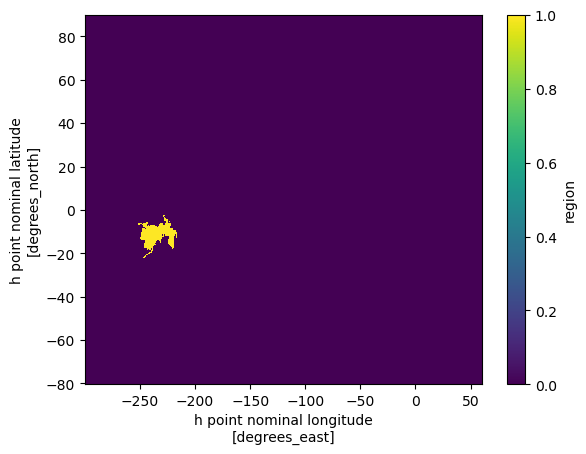

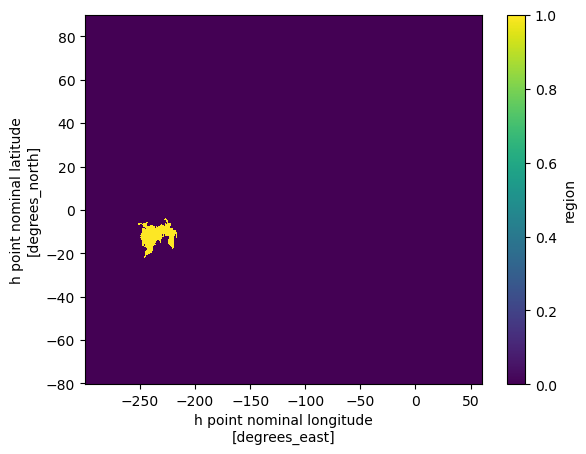

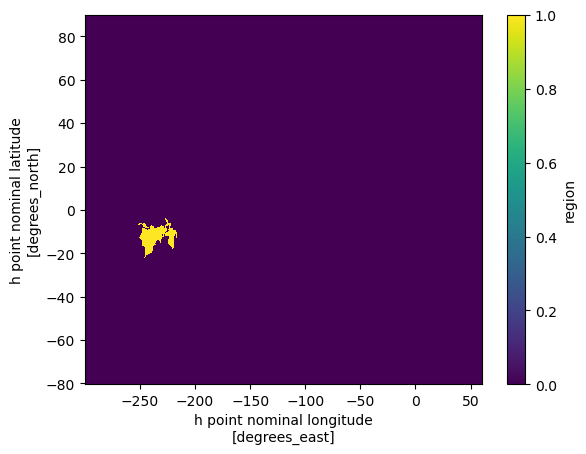

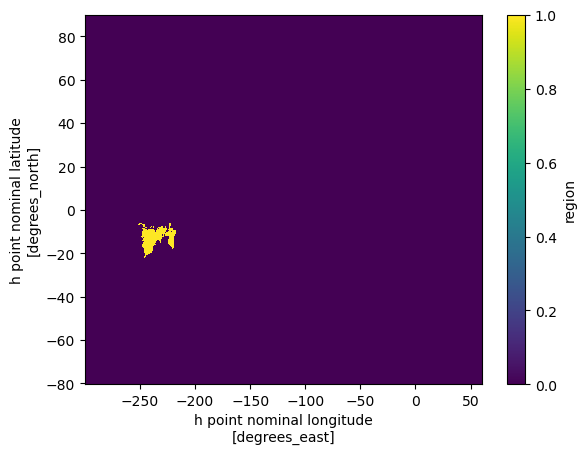

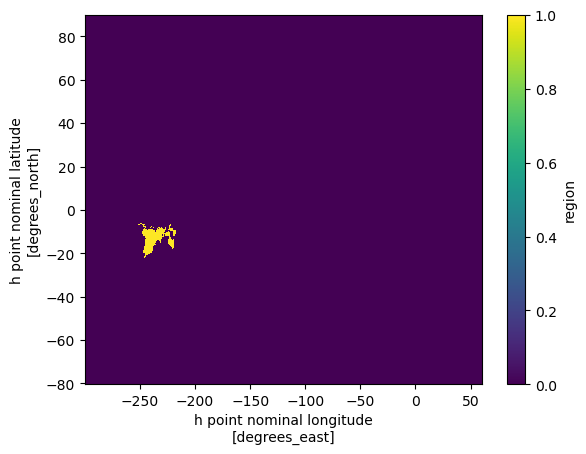

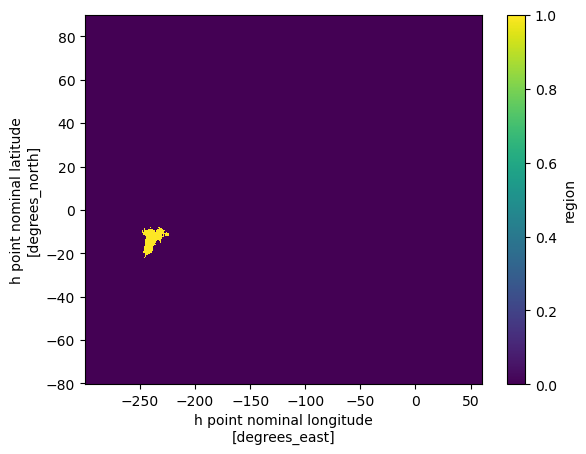

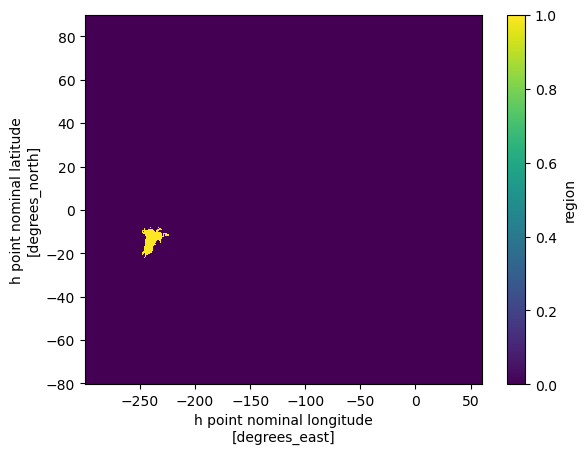

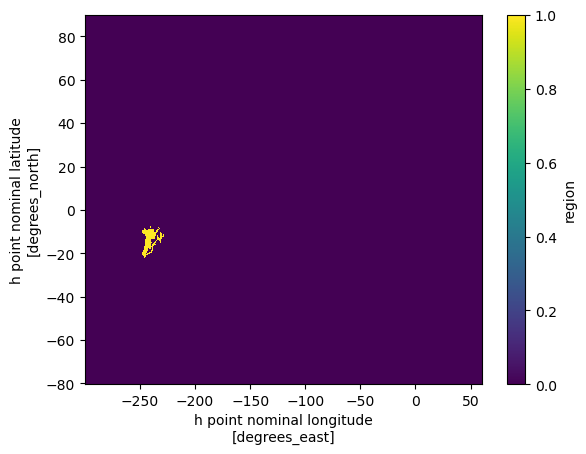

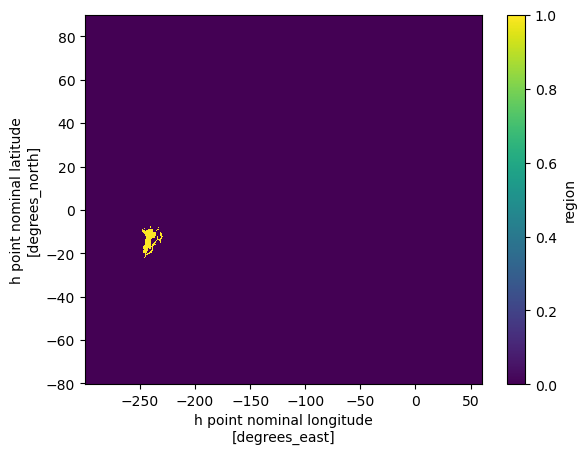

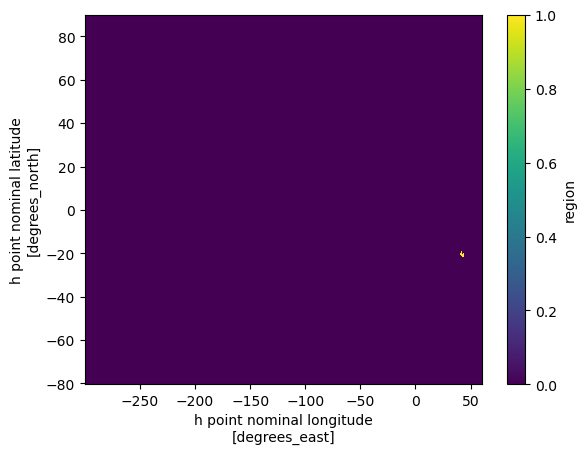

In [36]:
for event_mask in events[0]:
    plt.figure()
    event_mask.mask.plot()

for event_mask in events[1]:
    plt.figure()
    event_mask.mask.plot()

In [ ]:
for event_mask in events[0]:
    plt.figure()
    event_mask.mask.plot()

for event_mask in events[1]:
    plt.figure()
    event_mask.mask.plot()

for event_mask in events[2]:
    plt.figure()
    event_mask.mask.plot()

In [ ]:
A_regions.regions

In [ ]:
A_mask_n = reg.GriddedRegion(str(n), A_region_n.lons, A_region_n.lats, grid, ij=(A_region_n.i, A_region_n.j))
B_mask_m = reg.GriddedRegion(str(m), B_region_m.lons, B_region_m.lats, grid, ij=(B_region_m.i, B_region_m.j))

In [ ]:
vars(mask_0)

# Don't need

In [ ]:
A_regions = reg.MaskRegions(mask_tos.isel(time=0),grid,name= 'time = 0')
n = 0
m = 0
A_region_n = A_regions.regions[n]
A_mask_n = reg.GriddedRegion(str(n), A_region_n.lons, A_region_n.lats, grid, ij=(A_region_n.i, A_region_n.j))

events = {}
current_event = 0
time = 0
events[current_event] = [A_mask_n]
for i in range(1,10):
    B_regions = reg.MaskRegions(mask_tos.isel(time=time+i),grid,name= None)
    B_region_m = B_regions.regions[m]
    B_mask_m = reg.GriddedRegion(str(m), B_region_m.lons, B_region_m.lats, grid, ij=(B_region_m.i, B_region_m.j))
    
    A_area = (ds_tos_stat.areacello).where(A_mask_n.mask).sum(['xh','yh'])
    B_area = (ds_tos_stat.areacello).where(B_mask_m.mask).sum(['xh','yh'])
    
    AB_mask = (A_mask_n.mask & B_mask_m.mask)
    AB_area = (ds_tos_stat.areacello).where(AB_mask).sum(['xh','yh'])
    
    if AB_area/A_area >= .50:
        events[current_event] += [B_mask_m]
        A_mask_n = B_mask_m
        
    else:
        print(AB_area/A_area)
        A_mask_n = B_mask_m
        current_event += 1
        events[current_event] = [B_mask_m]